In [1]:
%matplotlib inline

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
X, label = make_blobs(100, centers = 1)

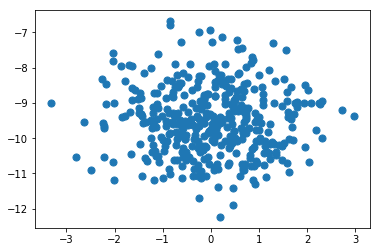

In [8]:
plt.scatter(X[:, 0], X[:, 1], s=50);

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

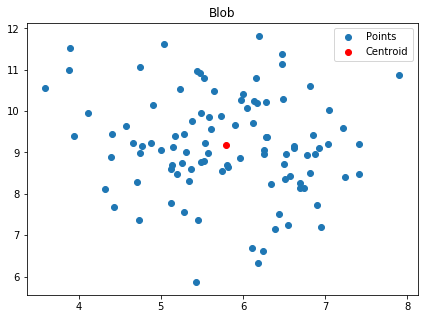

In [11]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Blob')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1], label='Centroid',
           color='r')
ax.legend(loc='best')

In [12]:
# identify the 5 closest points
distances = kmeans.transform(X)

In [13]:
# argsort returns an array of indexes which will sort the array
# in ascending order. Reverse it with [::-1]
sorted_idx = np.argsort(distances.ravel())[::-1][:5]



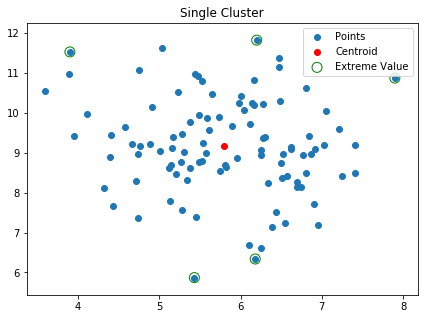

In [14]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0],
           X[sorted_idx][:, 1],
           label='Extreme Value', edgecolors='g',
           facecolors='none', s=100)
ax.legend(loc='best')

In [15]:
# simulating removing these outliers
new_X = np.delete(X, sorted_idx, axis=0)

In [16]:
# this causes the centroids to move slightly
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

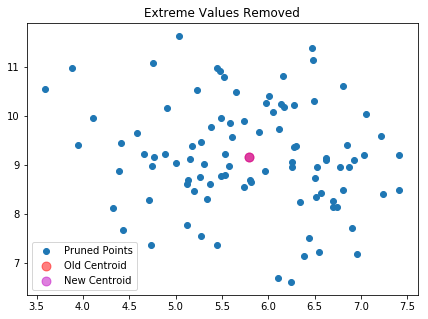

In [17]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title("Extreme Values Removed")
ax.scatter(new_X[:, 0], new_X[:, 1], label='Pruned Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           label='Old Centroid',
           color='r', s=80, alpha=.5)
ax.scatter(new_kmeans.cluster_centers_[:, 0],
           new_kmeans.cluster_centers_[:, 1],
           label='New Centroid',
           color='m', s=80, alpha=.5)
ax.legend(loc='best')

In [18]:
# There is a fundamental connection between Gaussian distribution
# and the KMeans clustering. Let's create an empirical Gaussian
# based off the centroid and sample covariance matrix and look
# at the probability of each point that we removed.
# this will show that the points we removed were the least likely
# to occur.

In [19]:
from scipy import stats
emp_dist = stats.multivariate_normal(kmeans.cluster_centers_.ravel())
lowest_prob_idx = np.argsort(emp_dist.pdf(X))[:5]
np.all(X[sorted_idx] == X[lowest_prob_idx])

True

In [21]:
print (kmeans.cluster_centers_)
print (kmeans.cluster_centers_.ravel())


[[5.79381167 9.16952239]]
[5.79381167 9.16952239]
